In [ ]:
%pip install -q requests matplotlib
%matplotlib inline

In [ ]:
import requests
import datetime
import matplotlib.pyplot as plt

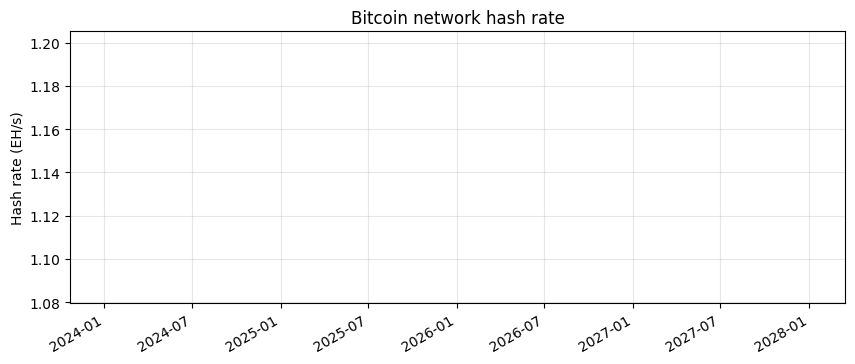

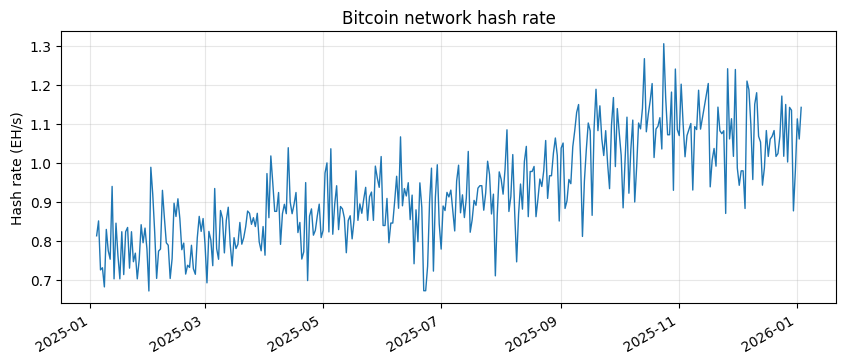

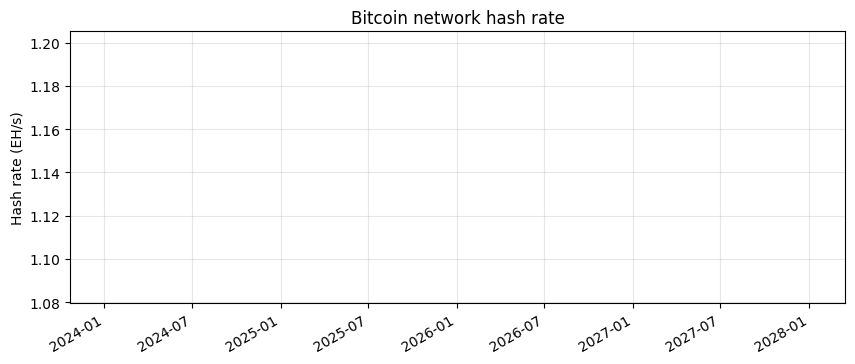

In [15]:
API = "https://api.blockchain.info/charts/hash-rate"

r_365 = requests.get(API, params={"timespan":"365days","format":"json"}, timeout=15)
js_365 = r_365.json()
r_1 = requests.get(API, params={"timespan":"1days","format":"json"}, timeout=15)
js_1 = r_1.json()
r_all = requests.get(API, params={"timespan":"1days","format":"json"}, timeout=15)
js_all = r_all.json()

jss = list((js_1, js_365, js_all))

for js in jss:

    UNIT = js.get("unit", "GH/s")
    MULT = {"H/s":1,"KH/s":1e3,"MH/s":1e6,"GH/s":1e9,"TH/s":1e12,"PH/s":1e15,"EH/s":1e18}.get(UNIT, 1e9)

    xs = [datetime.datetime.fromtimestamp(v["x"]) for v in js["values"]]
    ys = [v["y"] * MULT for v in js["values"]]

    plt.figure(figsize=(10,4))
    plt.plot(xs, [y/1e18 for y in ys], lw=1)
    plt.ylabel("Hash rate (EH/s)")
    plt.title("Bitcoin network hash rate")
    plt.grid(alpha=0.3)
    plt.gcf().autofmt_xdate()
    plt.show()